モジュールのインストール

In [1]:
# -*- coding: UTF-8 -*-

import cv2
import os
from moviepy.editor import *
import json
import PIL
#import tqdm
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import glob
import random
import math
import numpy as np
import scipy.ndimage
import copy
import pandas as pd
import matplotlib.pyplot as plt
import sys
import matplotlib.gridspec as gridspec
import seaborn as sns
from PIL import Image
import mpl_toolkits.axes_grid1
import matplotlib.cm as cm

server_data = '/Volumes/Drosophila2/Data'
local_data = '/Users/hiroki/Desktop/study/code/data'

datasets = {
        'mating'    : 'TsukubaRIKEN/mating_movie',
        'smile1'    : 'TsukubaRIKEN/seong09-191214-w1118EclosedFemale-smile-24h',
        'smile2'    : 'TsukubaRIKEN/seong09-191214-w1118EclosedMale-smile-24h',
        'w1118_1'   : 'TsukubaRIKEN/seong09-200429.w1118.M.ST',
        'w1118_2'   : 'TsukubaRIKEN/seong07-200422-w1118.F.ST',
        'w1118_3'   : 'TsukubaRIKEN/seong08-200429-w1118.ST.all-free',
        'OrR_1'     : 'TsukubaRIKEN/seong05-200514-OrR.M.ST',
        'OrR_2'     : 'TsukubaRIKEN/seong06-200514-OrR.F.ST',
        'OrR_3'     : 'TsukubaRIKEN/seong08-200514-0rR.ST.all-free',
        'CS_1'      : 'TsukubaRIKEN/seong09-200513.CS.M.ST',
        'CS_2'      : 'TsukubaRIKEN/seong10-20513CS.F.ST',
        'CS_3'      : 'TsukubaRIKEN/seong07-200513-CS.free.ST'
        }

mating_mv = [
        'vi_0033_20190424_133130',
        'vi_0034_20190425_013130',
        'vi_0035_20190425_133130',
        'vi_0036_20190426_013130',
        'vi_0037_20190426_133131',
        'vi_0038_20190427_013131',
        'vi_0039_20190427_133131',
        ]

smile1_mv = [
            'seong09-191214-w1118EclosedFemale-smile-24h',
            'seong09-191214-w1118EclosedFemale-smile-empty',
            'seong09-191214-w1118EclosedFemale-smile-empty2'
            ]

smile2_mv = [
            'seong09-191214-w1118EclosedMale-smile-24h',
            'seong09-191214-w1118EclosedMale-smile-empty1',
            'seong09-191214-w1118EclosedMale-smile-empty2'
            ]

w1118_1_mv = [
            'vi_0000_20200429_104213-back',
            'vi_0001_20200429_112841',
            'vi_0002_20200430_112841',
            'vi_0003_20200501_112841'
            ]

w1118_2_mv = [
            'seong07-200422-w1118.F.ST-back',
            'vi_0001_20200429_110751',
            'vi_0002_20200430_110751',
            'vi_0003_20200501_110751'
            ]

w1118_3_mv = [
            'vi_0001_20200429_094729',
            'vi_0002_20200429_104150',
            'vi_0003_20200430_104150',
            'vi_0004_20200501_104150'
            ]

OrR_1_mv = [
            'vi_0099_20200514_152926',
            'vi_0102_20200514_224210',
            'vi_0103_20200515_224210'
            ]

OrR_2_mv = [
            'vi_0110_20200514_152929(1)',
            'vi_0113_20200514_224230(1)',
            'vi_0114_20200515_224230'
            ]

OrR_3_mv = [
            'vi_0011_20200514_153005 (2)',
            'vi_0013_20200514_224247',
            'vi_0014_20200515_224247'
            ]

CS_1_mv =  [
            'vi_0014_20200513_182108 (1)',
            'vi_0015_20200513_193414 (1)',
            'vi_0016_20200514_193414'
            ]

CS_2_mv =  [
            'vi_0006_20200513_182208 (2)',
            'vi_0007_20200513_193827 (1)',
            'vi_0008_20200514_193827'
            ]

CS_3_mv =  [
            'vi_0016_20200513_182125 (1)',
            'vi_0017_20200513_194218 (1)',
            'vi_0018_20200514_194219'
            ]

movies = {
        'mating'    : mating_mv ,
        'smile1'    : smile1_mv ,
        'smile2'    : smile2_mv ,
        'w1118_1'   : w1118_1_mv,
        'w1118_2'   : w1118_2_mv,
        'w1118_3'   : w1118_3_mv,
        'OrR_1'     : OrR_1_mv  ,
        'OrR_2'     : OrR_2_mv  ,
        'OrR_3'     : OrR_3_mv  ,
        'CS_1'      : CS_1_mv   ,
        'CS_2'      : CS_2_mv   ,
        'CS_3'      : CS_3_mv   ,
        }

# 1:Male,2:Female,3:free

targets = [
            #'smile1',
            #'smile2',
            #'w1118_1',
            'w1118_2',
            #'w1118_3',
            #'OrR_1',
            #'OrR_2',
            #'OrR_3',
            #'CS_1',
            #'CS_2',
            #'CS_3'
            ]


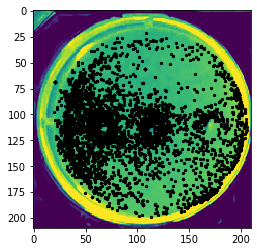

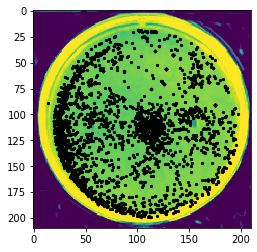

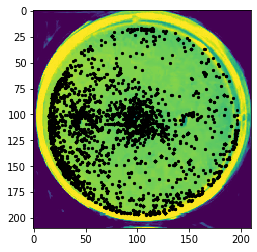

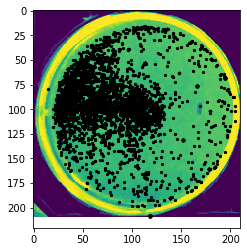

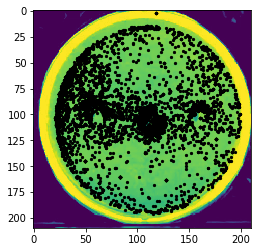

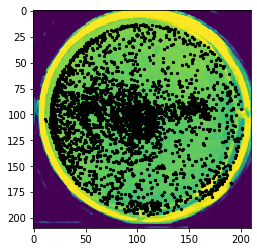

In [2]:
import matplotlib.image as mpimg
import csv 


# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }

for target in tqdm(targets):
    data_dir = datasets[target]
    
    #file_path = os.path.join("{}/{}/csv".format(server_data, data_dir))
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    
    # disper.csv は予め作った初期配置の重心を記録したcsv
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",")
    
    with open(os.path.join(server_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
     
    i = params['n-rows']
    j = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']

    mv_num = len(movies[target])
    mv_num = 2
    
    wells = i*j
    
    fps=3
    eclo_frames=np.zeros(wells)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    fs_dis = fs_dis.reshape(i*j, 2, 3)
    #wells=1
    
    #mv_num=len(movies[target])
    for num in range(1,mv_num):
        save_dir = os.path.join("{}/{}/csv/dispersion".format(local_data, data_dir))
        well_idx=0
        dfx_list=[]
        dfy_list=[]
        for well_idx in range(wells):
            load_dir= os.path.join(server_data,data_dir,'trim_movie',movies[target][num])
            save_dir2=os.path.join(local_data,data_dir,'trim_movie',movies[target][num])
            os.makedirs(save_dir2,exist_ok=True)
            eclo_frame = eclo_frames[well_idx]
            frg=cv2.VideoCapture('{}/well{:03}.mp4'.format(load_dir,well_idx))
            for i in range(1):
                frg.set(cv2.CAP_PROP_POS_FRAMES,i)
                ret,frame=frg.read()
                if ret:
                    frg_gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
                    cv2.imwrite('{}/well{:03}.png'.format(save_dir2,well_idx),frg_gray)
                    plt.imshow(frg_gray)
                    with open("{}/well{:03}.csv".format(save_dir,well_idx)) as h:
                        df=np.loadtxt(h,delimiter=',')
                        v=eclo_frames[well_idx]
                        df.reshape(-1,2)
                        dfx=df[:,1]
                        dfx_array=dfx.reshape(1,-1)
                        dfy=df[:,0]
                        dfy_array=dfy.reshape(1,-1)
                        dfx_list.insert(1,dfx)
                        dfy_list.insert(1,dfy)
                       
                        plt.scatter(dfx[int(v)::100],dfy[int(v)::100],s=5,c='black')
                        plt.savefig(os.path.join('{}/well{:03}fig.png'.format(save_dir2,well_idx)))
                        plt.show()
          
                else:
                    break
                    
      

In [34]:
dfx_list

[array([113.058824, 113.058824, 113.058824, ...,  59.454545,  58.395062,
         58.395062]),
 array([101.54386 , 101.54386 , 101.54386 , ..., 100.671053, 100.671053,
        100.671053]),
 array([109.      , 109.      , 109.      , ...,  89.541667,  98.      ,
         98.      ]),
 array([114.745763, 114.745763, 114.745763, ...,  64.      ,  64.      ,
         64.      ]),
 array([97.      , 97.      , 97.      , ..., 73.869565, 73.533333,
        73.533333]),
 array([108.111111, 108.111111, 108.111111, ...,  25.5     ,  25.5     ,
         25.5     ])]

     start_frame   count
0          51912  152667
1         204580    1488
2         206069    8580
3         214650     116
4         214768      20
..           ...     ...
700       735050    2540
701       737591       6
702       737598     579
703       738178    1518
704       739698    1132

[705 rows x 2 columns]


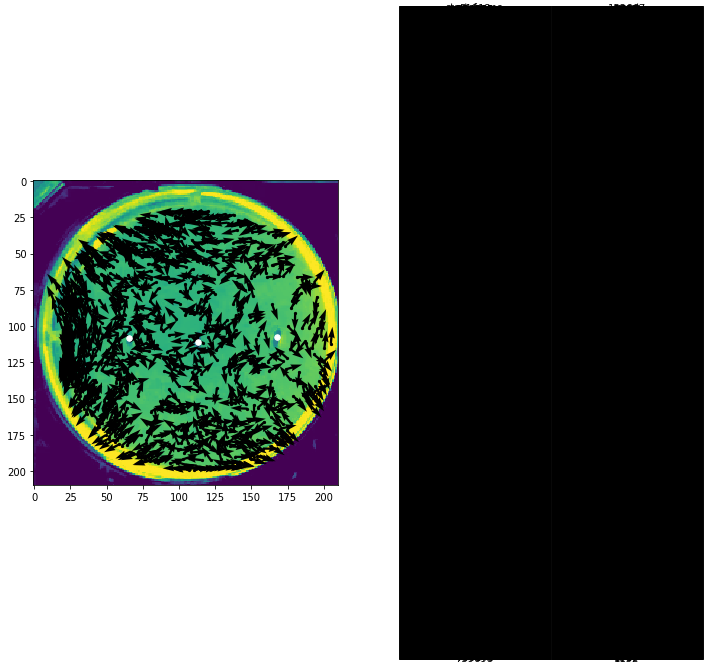

     start_frame  count
0         216351     22
1         216374      6
2         216381      2
3         216386     60
4         216451      2
..           ...    ...
690       738821    527
691       739349    159
692       739509    941
693       740451     47
694       740499    331

[695 rows x 2 columns]


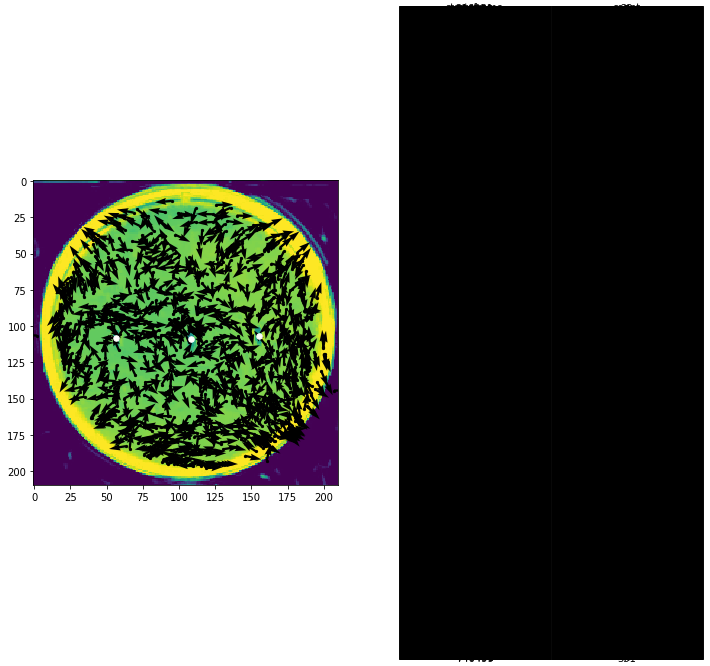

     start_frame  count
0         235089  37397
1         272487   1284
2         273772   1486
3         275259  12511
4         287771   1780
..           ...    ...
470       737857    272
471       738130   1031
472       739162    609
473       739772    857
474       740630    200

[475 rows x 2 columns]


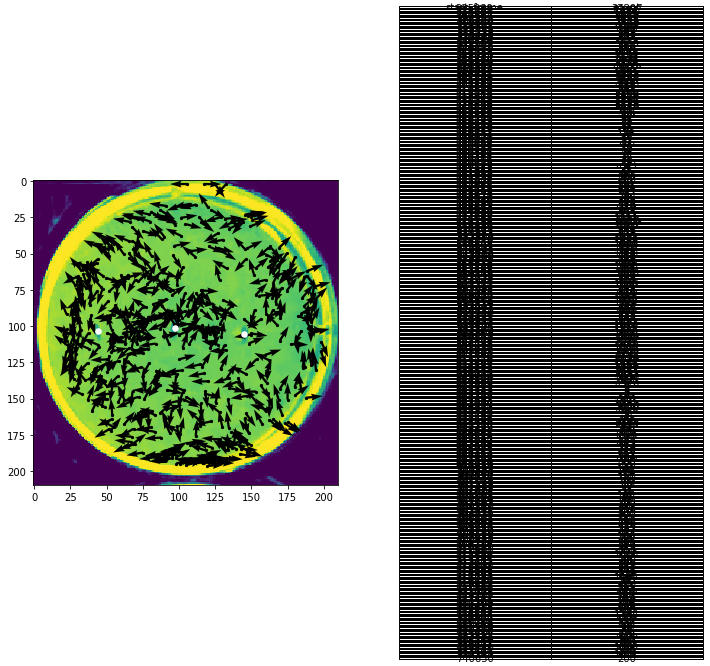

     start_frame  count
0          57066   1613
1          58681    416
2          59098    910
3          60009      3
4          60014   1336
..           ...    ...
842       736453      5
843       736460   4148
844       740609      5
845       740615      2
846       740618    212

[847 rows x 2 columns]


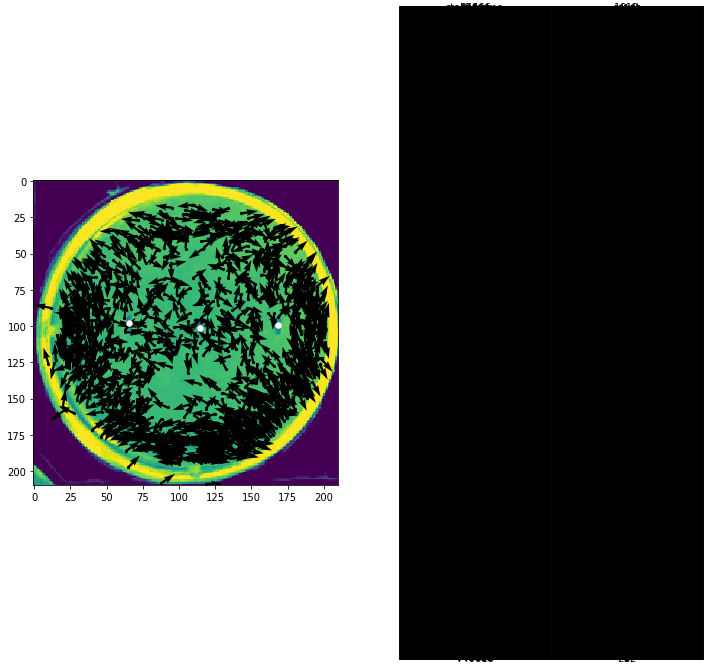

      start_frame  count
0          167607  72759
1          240367    253
2          240621   4781
3          245403   5185
4          250589  31058
...           ...    ...
1291       725659     40
1292       725702     31
1293       725734   7360
1294       733095   4300
1295       737396   3434

[1296 rows x 2 columns]


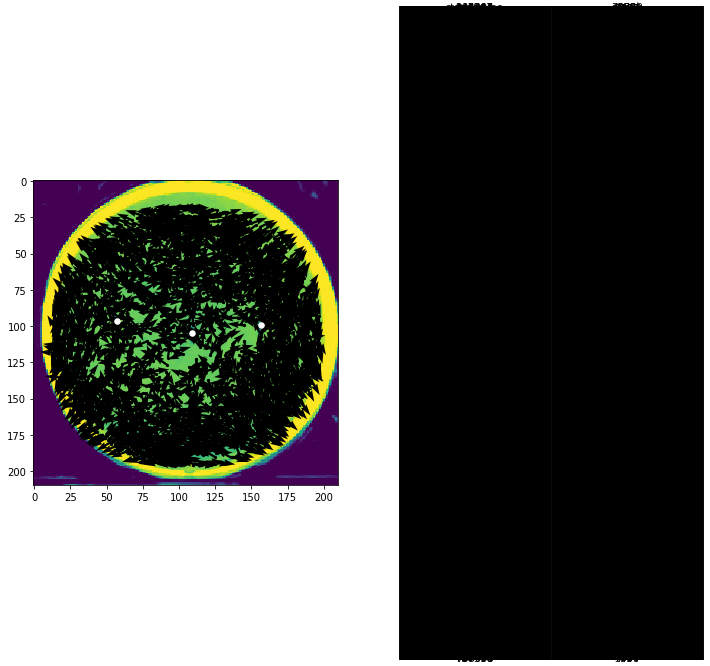

     start_frame  count
0         123162  93730
1         216893   1219
2         218113   1643
3         219757    288
4         220046    413
..           ...    ...
317       718142     94
318       718237     65
319       718303   2038
320       720342  11190
321       731533   9297

[322 rows x 2 columns]


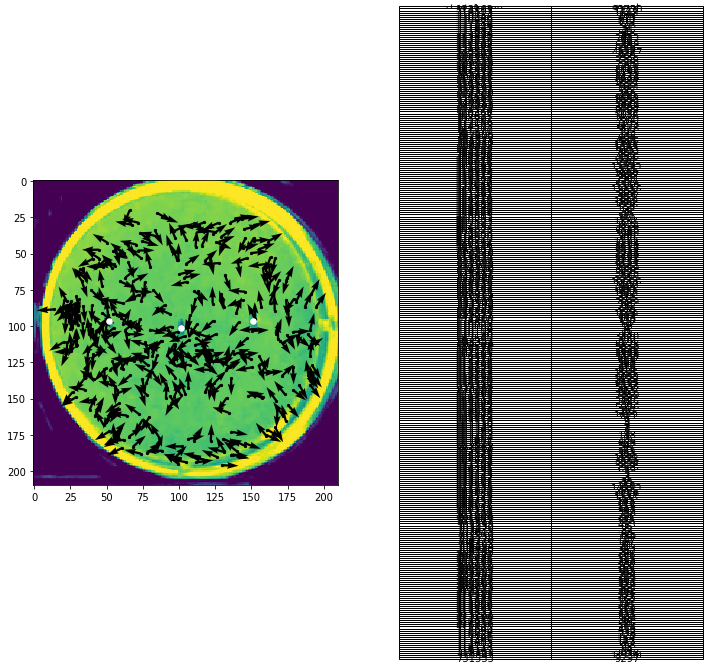

In [8]:
import matplotlib.animation as animation

# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }

for target in tqdm(targets):
    data_dir = datasets[target]
    
   
    with open(os.path.join(server_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    i = params['n-rows']
    j = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']

    mv_num = len(movies[target])
    mv_num = 2  
    wells = i*j 
    fps=3
    stay_start=0
    
    tar_mv = movies[target][1]

    tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

    # 前景用動画読み込みの設定
    movie = cv2.VideoCapture(tar_path)

    # 動画ファイル保存用の設定
    fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
    
    #fps=3
    eclo_frames=np.zeros(wells)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",").reshape(6,2,3)

    for well_idx in range(wells):
        G=np.loadtxt(os.path.join(file_path, 'dispersion/well{:03}.csv'.format(well_idx)), delimiter=",")
        k=int(len(G))
        
        load_dir=os.path.join(local_data,data_dir,'trim_movie',movies[target][num])
        save_dir2=os.path.join(local_data,data_dir,'trim_movie',movies[target][num])
        eclo_frame=eclo_frames[well_idx]
        error_array=[]
        stay_frame=np.zeros(k)
        active_frame=np.zeros(k)
        active_frame_list=[]
        stay_count=1
        stay_count_list=[]
        stay_start_frame_list=[]
        active_dfx=[]
        active_dfy=[]
        active_dif_dfx_list=[]
        active_dif_dfy_list=[]
        dif_dis_dfx=(fs_dis[well_idx][1,0]-fs_dis[well_idx][1,1])
        dif_dis_dfy=(fs_dis[well_idx][0,0]-fs_dis[well_idx][0,1]) 
        #dif_dis_vector=np.array([dif_dis_dfx,dif_dis_dfy])
        #dif_dis_norm=np.linalg.norm(dif_dis_vector)
        grad_dif_dis_vector=dif_dis_dfy/dif_dis_dfx
        png=mpimg.imread(os.path.join('{}/well{:03}.png'.format(save_dir2,well_idx)))
        fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,12))
        ax1=axes[0]
        ax2=axes[1]
        ax1.imshow(png)
        f1 = int(eclo_frames[well_idx])
        f2 = int(f1 + 20*3600*fps)
        for n in range(f1,k+1):
            dfx_content=dfx_list[well_idx]
            dif_dfx=dfx_content[n-1]-dfx_content[n-2]
            dfy_content=dfy_list[well_idx]
            dif_dfy=dfy_content[n-1]-dfy_content[n-2]
            grad_dif_vector=dif_dfy/dif_dfx
            dif_vector=np.array([dif_dfx,dif_dfy])
            dif_norm=np.linalg.norm(dif_vector,ord=2)
            norm_thre=15

            #error_array=np.zeros([eclo_frame,:])

            if dif_norm<norm_thre:
                stay_frame[n-1]=n
                if stay_frame[n-1]-stay_frame[n-2]==1:
                    stay_count+=1
                    stay_start+=1
                    if n==k:
                        stay_count_list.append(stay_count)
                        stay_count=0
                        break
                    else:
                        if stay_start==1:
                            stay_start_frame_list.append(n-1)
                else:
                    if stay_count>1:
                        stay_count_list.append(stay_count)
                    stay_count=1
                    stay_start=0
            else:
                active_frame[n-1]=n
                active_frame_list.append(n)
                active_dfx.append(dfx_content[n-1])
                active_dfy.append(dfy_content[n-1])
                active_dif_dfx=dif_dfx
                active_dif_dfy=dif_dfy
                active_dif_dfx_list.append(active_dif_dfx)
                active_dif_dfy_list.append(active_dif_dfy)

                error=(grad_dif_dis_vector-grad_dif_vector)/grad_dif_dis_vector
                #error_array[n]=error
                np.append(error_array,error) 


                ax1.scatter(dfx_content[n-1],dfy_content[n-1],s=5,c='black')
                ax1.quiver(dfx_content[n-1],dfy_content[n-1],dif_vector[0],dif_vector[1],headwidth=3)

                #print(active_dif_dfx_list)
                #print(active_dif_dfy_list)

        ax1.scatter(fs_dis[well_idx][1,0],fs_dis[well_idx][0,0],s=30,c='white')
        ax1.scatter(fs_dis[well_idx][1,2],fs_dis[well_idx][0,2],s=30,c='white')
        ax1.scatter(fs_dis[well_idx][1,1],fs_dis[well_idx][0,1],s=30,c='white')
        #os.makedirs(os.path.join('{}/thre{}/scatter'.format(save_dir2,norm_thre)),exist_ok=True)
        #os.makedirs(os.path.join('{}/thre{}/vector'.format(save_dir2,norm_thre)),exist_ok=True)
        #plt.savefig(os.path.join('{}/thre{}/vector/well{:03}vectorfig.png'.format(save_dir2,norm_thre,well_idx)))
        stay_df=pd.DataFrame({'start_frame':stay_start_frame_list,'count':stay_count_list})
        print(stay_df)


        #plt.savefig(os.path.join('{}/thre{}/scatter/well{:03}scatterfig.png'.format(save_dir2,norm_thre,well_idx)))

        ax2.axis('off')
        ax2.axis('tight')
        ax2.table(cellText=stay_df.values,colLabels=stay_df.columns,loc='center',cellLoc='center',bbox=[0,0,1,1])
        os.makedirs(os.path.join('{}/thre{}/vector_table'.format(save_dir2,norm_thre)),exist_ok=True)
        plt.savefig(os.path.join('{}/thre{}/vector_table/well{:03}.png'.format(save_dir2,norm_thre,well_idx)))
        #os.makedirs(os.path.join('{}/thre{}/GIF'.format(save_dir2,norm_thre)),exist_ok=True
        plt.show() 
        

       



IndexError: index 260124 is out of bounds for axis 0 with size 246943

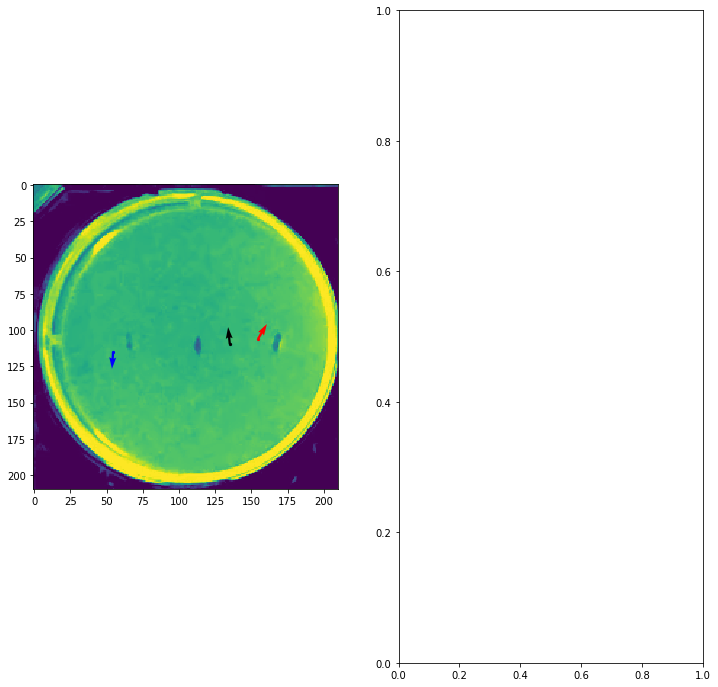

In [9]:
# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }

for target in tqdm(targets):
    data_dir = datasets[target]
    
   
    with open(os.path.join(server_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    i = params['n-rows']
    j = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']

    mv_num = len(movies[target])
    mv_num = 2
    num=1
    wells = i*j 
    fps=3
    stay_start=0
    
    tar_mv = movies[target][1]

    tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

    # 前景用動画読み込みの設定
    movie = cv2.VideoCapture(tar_path)

    # 動画ファイル保存用の設定
    fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
    
    #fps=3
    eclo_frames=np.zeros(wells)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",").reshape(6,2,3)
    
    for well_idx in range(wells):
        G=np.loadtxt(os.path.join(file_path, 'dispersion/well{:03}.csv'.format(well_idx)), delimiter=",")
        k=int(len(G)/3)
        
        load_dir= os.path.join(local_data,data_dir,'trim_movie',movies[target][num])
        save_dir2=os.path.join(local_data,data_dir,'trim_movie',movies[target][num])
        f1 = int(eclo_frames[well_idx])
        f2 = int(f1 + 20*3600*fps)
        error_array=[]
        stay_frame=np.zeros(k)
        ff_stay_frame=np.zeros(k)
        fp_stay_frame=np.zeros(k)
        fm_stay_frame=np.zeros(k)
        active_frame=np.zeros(k)
        active_frame_list=[]
        stay_count=1
        stay_count_list=[]
        stay_start_frame_list=[]
        active_dfx=[]
        active_dfy=[]
        active_dif_dfx_list=[]
        active_dif_dfy_list=[]
        dif_dis_dfx=(fs_dis[well_idx][1,0]-fs_dis[well_idx][1,1])
        dif_dis_dfy=(fs_dis[well_idx][0,0]-fs_dis[well_idx][0,1]) 
        male_dis=(fs_dis[well_idx][1,0],fs_dis[well_idx][0,0])
        pupa_dis=(fs_dis[well_idx][1,1],fs_dis[well_idx][0,1])
        female_dis=(fs_dis[well_idx][1,2],fs_dis[well_idx][0,2])
        dif_dis_vector=np.array([dif_dis_dfx,dif_dis_dfy])
        dif_dis_norm=np.linalg.norm(dif_dis_vector)
        grad_dif_dis_vector=dif_dis_dfy/dif_dis_dfx
        png=mpimg.imread(os.path.join('{}/well{:03}.png'.format(save_dir2,well_idx)))
        fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,12))
        ax1=axes[0]
        ax2=axes[1]
        ax1.imshow(png)
        ff_listx=[]
        ff_listy=[]
        fp_listx=[]
        fp_listy=[]
        fm_listx=[]
        fm_listy=[]
        ff_disx=np.zeros(well_idx)
        ff_disy=np.zeros(well_idx)
        fp_disx=np.zeros(well_idx)
        fp_disy=np.zeros(well_idx)
        fm_disx=np.zeros(well_idx)
        fm_disy=np.zeros(well_idx)
        for n in range(f1,f2):
            dfx_content=dfx_list[well_idx]
            dif_dfx=dfx_content[n-1]-dfx_content[n-2]
            dfy_content=dfy_list[well_idx]
            dif_dfy=dfy_content[n-1]-dfy_content[n-2]
            grad_dif_vector=dif_dfy/dif_dfx
            dif_vector=np.array([dif_dfx,dif_dfy])
            dif_norm=np.linalg.norm(dif_vector,ord=2)
            female_female_vector=np.array([female_dis[0]-dfx_content[n-1],male_dis[1]-dfy_content[n-1]])
            female_female_norm=np.linalg.norm(female_female_vector,ord=2)
            female_male_vector=np.array([male_dis[0]-dfx_content[n-1],female_dis[1]-dfy_content[n-1]])
            female_male_norm=np.linalg.norm(female_male_vector,ord=2)
            female_pupa_vector=np.array([pupa_dis[0]-dfx_content[n-1],pupa_dis[1]-dfy_content[n-1]])
            female_pupa_norm=np.linalg.norm(female_pupa_vector,ord=2)
            radius_norm_thre=25
            norm_thre=15

            #error_array=np.zeros([eclo_frame,:])


            if norm_thre<dif_norm:
                active_frame[n-1]=n
                active_frame_list.append(n)
                active_dfx.append(dfx_content[n-1])
                active_dfy.append(dfy_content[n-1])
                active_dif_dfx=dif_dfx
                active_dif_dfy=dif_dfy
                active_dif_dfx_list.append(active_dif_dfx)
                active_dif_dfy_list.append(active_dif_dfy)

                error=(grad_dif_dis_vector-grad_dif_vector)/grad_dif_dis_vector
                #error_array[n]=error
                np.append(error_array,error) 

                if female_female_norm<radius_norm_thre:
                    ax1.scatter(dfx_content[n-1],dfy_content[n-1],s=5,c='red')
                    ax1.quiver(dfx_content[n-1],dfy_content[n-1],dif_vector[0],dif_vector[1],headwidth=3,color='red')
                elif female_pupa_norm<radius_norm_thre:
                    ax1.scatter(dfx_content[n-1],dfy_content[n-1],s=5,c='black')
                    ax1.quiver(dfx_content[n-1],dfy_content[n-1],dif_vector[0],dif_vector[1],headwidth=3,color='black')
                elif female_male_norm<radius_norm_thre:
                    ax1.scatter(dfx_content[n-1],dfy_content[n-1],s=5,c='blue')
                    ax1.quiver(dfx_content[n-1],dfy_content[n-1],dif_vector[0],dif_vector[1],headwidth=3,color='blue')



            #ax2.axis('off')
            #ax2.table(cellText=stay_df.values,colLabels=stay_df.columns,loc='center',cellLoc='center',bbox=[0,0,1,1])
        ax1.scatter(fs_dis[well_idx][1,0],fs_dis[well_idx][0,0],s=30,c='white')
        ax1.scatter(fs_dis[well_idx][1,2],fs_dis[well_idx][0,2],s=30,c='white')
        ax1.scatter(fs_dis[well_idx][1,1],fs_dis[well_idx][0,1],s=30,c='white')
        #os.makedirs(os.path.join('{}/thre{}/scatter'.format(save_dir2,norm_thre)),exist_ok=True)
        os.makedirs(os.path.join('{}/thre{}/colorvector/thre{}'.format(save_dir2,norm_thre,radius_norm_thre)),exist_ok=True)
        plt.savefig(os.path.join('{}/thre{}/colorvector/thre{}/well{:03}fig.png'.format(save_dir2,norm_thre,radius_norm_thre,well_idx)))
        #stay_df=pd.DataFrame({'count':stay_count_list,'start_frame':stay_start_frame_list})
        #print(stay_df)


        #plt.savefig(os.path.join('{}/thre{}/scatter/well{:03}scatterfig.png'.format(save_dir2,norm_thre,well_idx)))



        #os.makedirs(os.path.join('{}/thre{}/vector_table'.format(save_dir2,norm_thre)),exist_ok=True)
        #plt.savefig(os.path.join('{}/thre{}/vector_table/well{:03}.png'.format(save_dir2,norm_thre,well_idx)))
        #os.makedirs(os.path.join('{}/thre{}/GIF'.format(save_dir2,norm_thre)),exist_ok=True
        plt.show() 


       



In [5]:
# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }

for target in tqdm(targets):
    data_dir = datasets[target]
    
   
    with open(os.path.join(server_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    i = params['n-rows']
    j = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']

    mv_num = len(movies[target])
    mv_num = 2
    num=1
    wells = i*j 
    fps=3
    stay_start=0
    
    tar_mv = movies[target][1]

    tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

    # 前景用動画読み込みの設定
    movie = cv2.VideoCapture(tar_path)

    # 動画ファイル保存用の設定
    fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
    
    #fps=3
    eclo_frames=np.zeros(wells)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",").reshape(6,2,3)
    
    for well_idx in range(wells):
        G=np.loadtxt(os.path.join(file_path, 'dispersion/well{:03}.csv'.format(well_idx)), delimiter=",")
        
        load_dir= os.path.join(local_data,data_dir,'trim_movie',movies[target][num])
        save_dir2=os.path.join(local_data,data_dir,'trim_movie',movies[target][num])
        f1 = int(eclo_frames[well_idx])
        f2 = int(f1 + 20*3600*fps)
        
        
        
        if female_female_norm<radius_norm_thre:
            ax1.scatter(dfx_content[n-1],dfy_content[n-1],s=5,c='red')
            ax1.quiver(dfx_content[n-1],dfy_content[n-1],dif_vector[0],dif_vector[1],headwidth=3,color='red')
        elif female_pupa_norm<radius_norm_thre:
            ax1.scatter(dfx_content[n-1],dfy_content[n-1],s=5,c='black')
            ax1.quiver(dfx_content[n-1],dfy_content[n-1],dif_vector[0],dif_vector[1],headwidth=3,color='black')
        elif female_male_norm<radius_norm_thre:
            ax1.scatter(dfx_content[n-1],dfy_content[n-1],s=5,c='blue')
            ax1.quiver(dfx_content[n-1],dfy_content[n-1],dif_vector[0],dif_vector[1],headwidth=3,color='blue')



            #ax2.axis('off')
            #ax2.table(cellText=stay_df.values,colLabels=stay_df.columns,loc='center',cellLoc='center',bbox=[0,0,1,1])
        ax1.scatter(fs_dis[well_idx][1,0],fs_dis[well_idx][0,0],s=30,c='white')
        ax1.scatter(fs_dis[well_idx][1,2],fs_dis[well_idx][0,2],s=30,c='white')
        ax1.scatter(fs_dis[well_idx][1,1],fs_dis[well_idx][0,1],s=30,c='white')
        #os.makedirs(os.path.join('{}/thre{}/scatter'.format(save_dir2,norm_thre)),exist_ok=True)
        os.makedirs(os.path.join('{}/thre{}/colorvector/thre{}'.format(save_dir2,norm_thre,radius_norm_thre)),exist_ok=True)
        plt.savefig(os.path.join('{}/thre{}/colorvector/thre{}/well{:03}fig.png'.format(save_dir2,norm_thre,radius_norm_thre,well_idx)))
        #stay_df=pd.DataFrame({'count':stay_count_list,'start_frame':stay_start_frame_list})
        #print(stay_df)


        #plt.savefig(os.path.join('{}/thre{}/scatter/well{:03}scatterfig.png'.format(save_dir2,norm_thre,well_idx)))



        #os.makedirs(os.path.join('{}/thre{}/vector_table'.format(save_dir2,norm_thre)),exist_ok=True)
        #plt.savefig(os.path.join('{}/thre{}/vector_table/well{:03}.png'.format(save_dir2,norm_thre,well_idx)))
        #os.makedirs(os.path.join('{}/thre{}/GIF'.format(save_dir2,norm_thre)),exist_ok=True
        plt.show() 


       



IndentationError: unexpected indent (<ipython-input-5-848149069545>, line 69)

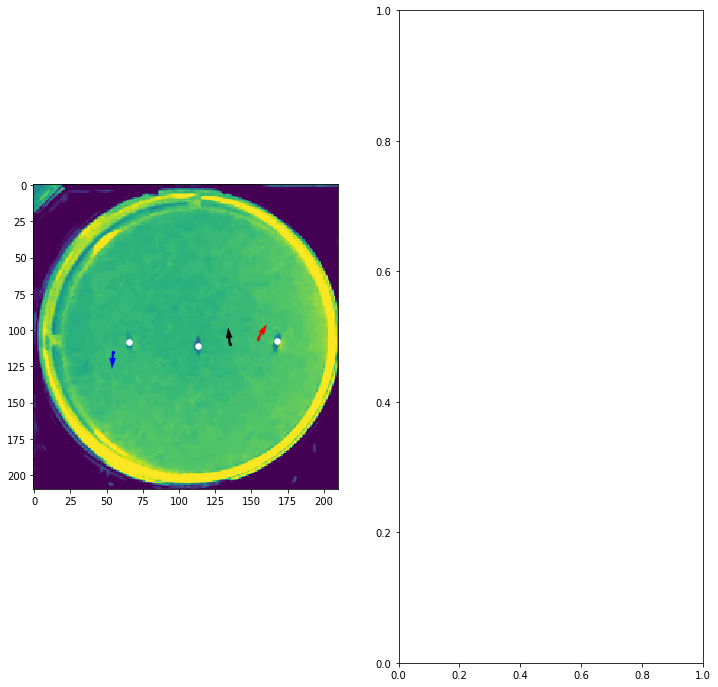

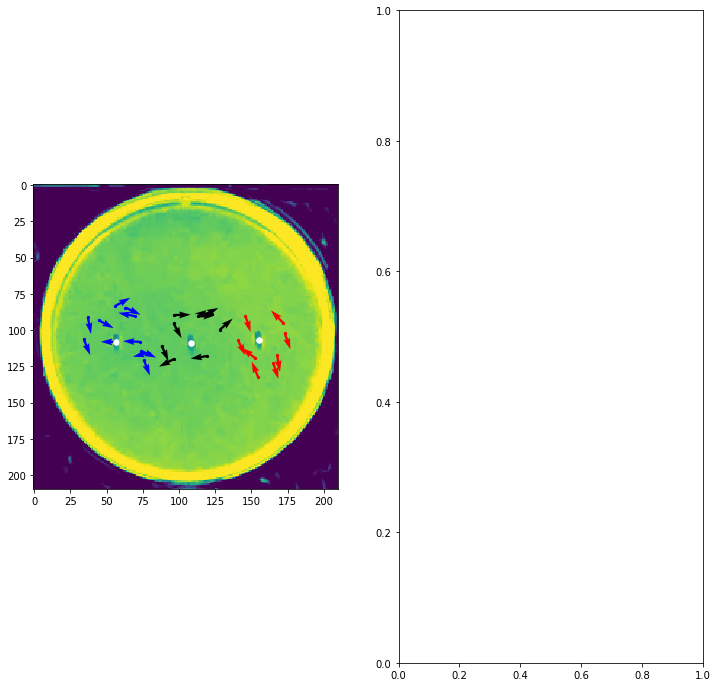

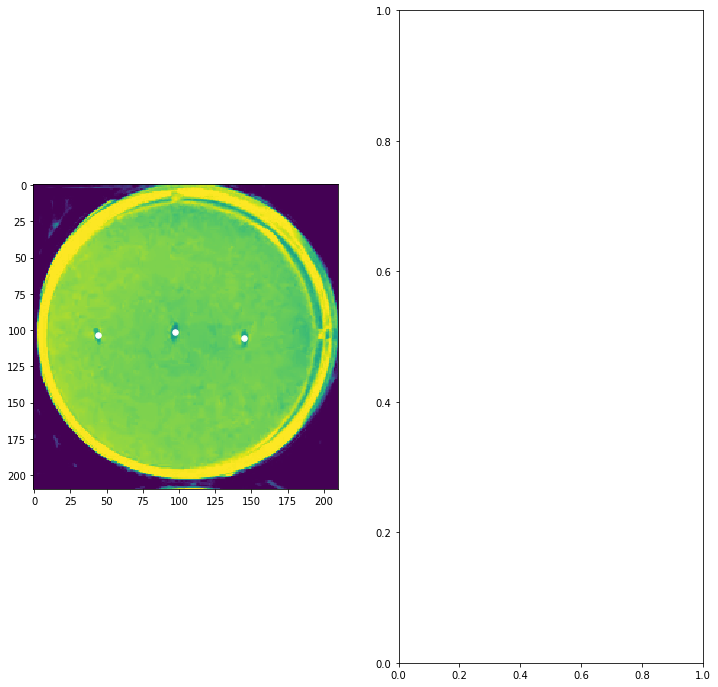

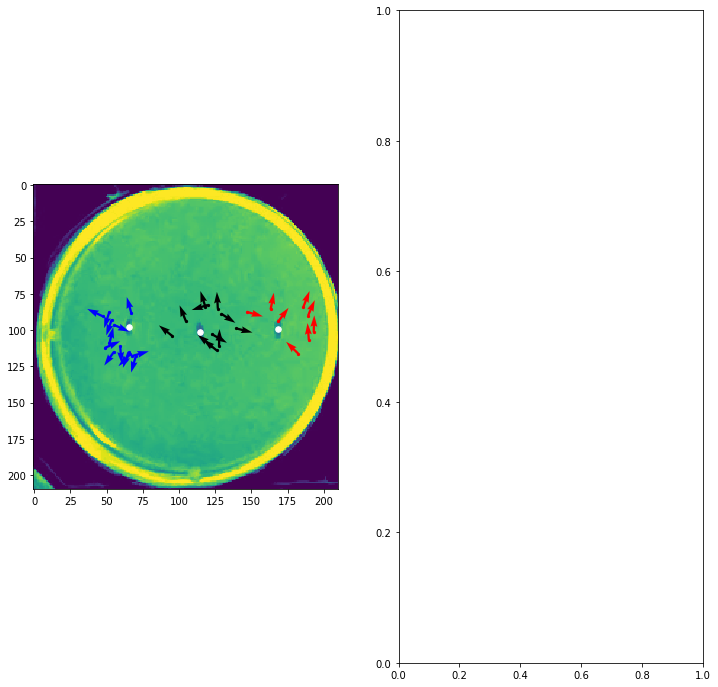

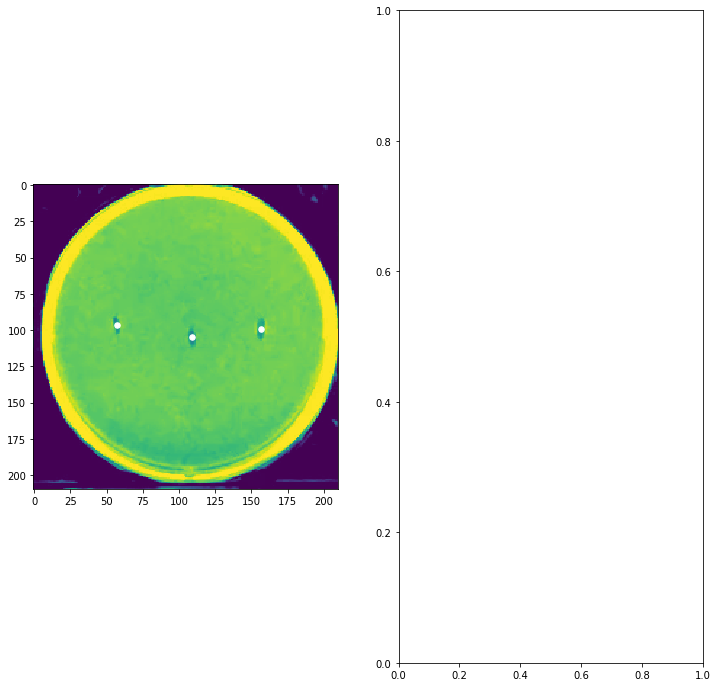

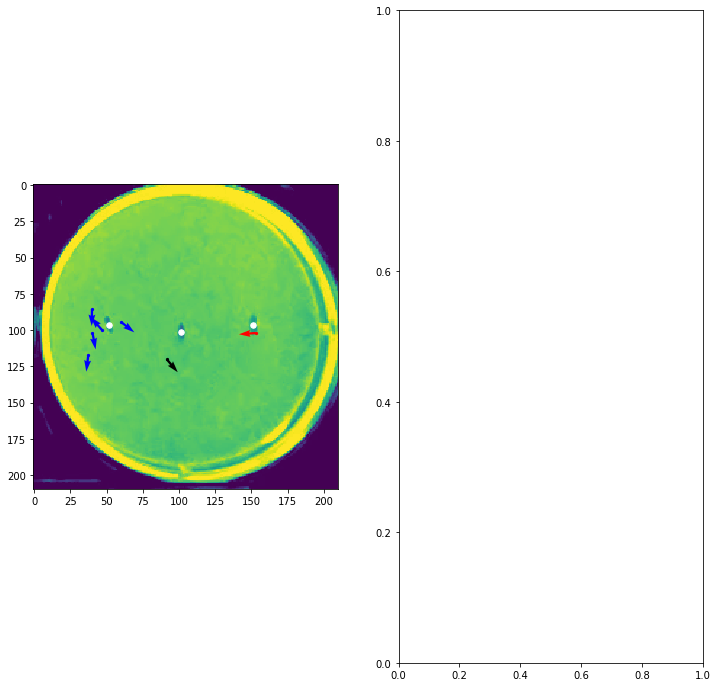

In [20]:
# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20'],
            'w1118_2' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['2:17:11','2:30:46','21:0:15','20:18:22','14:50:57','2:35:20'],
            'OrR_1'   : ['3:17:17', '14:19:58', '11:32:9', '6:52:35', '11:29:47', '3:39:6'], 
            'OrR_2'   : ['11:19:30', '9:39:54', '10:2:29', '11:46:19', '9:49:48', '9:11:44'],
            'OrR_3'   : ['8:27:54','7:35:22','8:25:0','0:31:12','11:30:37','9:13:10'],
            'CS_1'    : ['12:9:6', '16:53:56', '14:16:44', '16:12:37', '13:11:6', '18:30:31'],
            'CS_2'    : ['16:11:28', '9:15:34', '0:0:0', '12:47:55', '13:42:40', '14:27:52'],
            'CS_3'    : ['12:5:21','12:44:23','6:41:34','11:26:11','11:6:31','8:3:1'],
            }

for target in tqdm(targets):
    data_dir = datasets[target]
    
   
    with open(os.path.join(server_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    i = params['n-rows']
    j = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']

    mv_num = len(movies[target])
    mv_num = 2  
    wells=i*j
    fps=3
    stay_start=0
    
    tar_mv = movies[target][1]

    tar_path = os.path.join('{}/{}/{}.mp4'.format(server_data, data_dir, tar_mv))

    # 前景用動画読み込みの設定
    movie = cv2.VideoCapture(tar_path)

    # 動画ファイル保存用の設定
    fps = int(movie.get(cv2.CAP_PROP_FPS))                         # 動画のFPSを取得
    
    #fps=3
    eclo_frames=np.zeros(wells)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    file_path = os.path.join("{}/{}/csv".format(local_data, data_dir))
    fs_dis = np.loadtxt("{}/fs_disper.csv".format(file_path), delimiter=",").reshape(6,2,3)
    wells=1
    
    for well_idx in range(wells):
        G=np.loadtxt(os.path.join(file_path, 'dispersion/well{:03}.csv'.format(well_idx)), delimiter=",")
        k=int(len(G)/3)
        
        load_dir= os.path.join(local_data,data_dir,'trim_movie',movies[target][num])
        save_dir2=os.path.join(local_data,data_dir,'trim_movie',movies[target][num])
        eclo_frame=eclo_frames[well_idx]
        error_array=[]
        stay_frame=np.zeros(k)
        ff_stay_frame=np.zeros(k)
        fp_stay_frame=np.zeros(k)
        fm_stay_frame=np.zeros(k)
        active_frame=np.zeros(k)
        active_frame_list=[]
        stay_count=1
        stay_count_list=[]
        stay_start_frame_list=[]
        active_dfx=[]
        active_dfy=[]
        active_dif_dfx_list=[]
        active_dif_dfy_list=[]
        dif_dis_dfx=(fs_dis[well_idx][1,0]-fs_dis[well_idx][1,1])
        dif_dis_dfy=(fs_dis[well_idx][0,0]-fs_dis[well_idx][0,1]) 
        male_dis=(fs_dis[well_idx][1,0],fs_dis[well_idx][0,0])
        pupa_dis=(fs_dis[well_idx][1,1],fs_dis[well_idx][0,1])
        female_dis=(fs_dis[well_idx][1,2],fs_dis[well_idx][0,2])
        dif_dis_vector=np.array([dif_dis_dfx,dif_dis_dfy])
        dif_dis_norm=np.linalg.norm(dif_dis_vector)
        grad_dif_dis_vector=dif_dis_dfy/dif_dis_dfx
        png=mpimg.imread(os.path.join('{}/well{:03}.png'.format(save_dir2,well_idx)))
        fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,12))
        ax1=axes[0]
        ax2=axes[1]
        ax1.imshow(png)
        ff_listx=[]
        ff_listy=[]
        fp_listx=[]
        fp_listy=[]
        fm_listx=[]
        fm_listy=[]
        ff_disx=np.zeros(well_idx)
        ff_disy=np.zeros(well_idx)
        fp_disx=np.zeros(well_idx)
        fp_disy=np.zeros(well_idx)
        fm_disx=np.zeros(well_idx)
        fm_disy=np.zeros(well_idx)
        for n in range(int(eclo_frame),k+1):
            dfx_content=dfx_list[well_idx]
            dif_dfx=dfx_content[n-1]-dfx_content[n-2]
            dfy_content=dfy_list[well_idx]
            dif_dfy=dfy_content[n-1]-dfy_content[n-2]
            grad_dif_vector=dif_dfy/dif_dfx
            dif_vector=np.array([dif_dfx,dif_dfy])
            dif_norm=np.linalg.norm(dif_vector,ord=2)
            female_female_vector=np.array([female_dis[0]-dfx_content[n-1],male_dis[1]-dfy_content[n-1]])
            female_female_norm=np.linalg.norm(female_female_vector,ord=2)
            female_male_vector=np.array([male_dis[0]-dfx_content[n-1],female_dis[1]-dfy_content[n-1]])
            female_male_norm=np.linalg.norm(female_male_vector,ord=2)
            female_pupa_vector=np.array([pupa_dis[0]-dfx_content[n-1],pupa_dis[1]-dfy_content[n-1]])
            female_pupa_norm=np.linalg.norm(female_pupa_vector,ord=2)
            radius_norm_thre=25
            norm_thre=15

            #error_array=np.zeros([eclo_frame,:])


            if norm_thre<dif_norm:
                active_frame[n-1]=n
                active_frame_list.append(n)
                active_dfx.append(dfx_content[n-1])
                active_dfy.append(dfy_content[n-1])
                active_dif_dfx=dif_dfx
                active_dif_dfy=dif_dfy
                active_dif_dfx_list.append(active_dif_dfx)
                active_dif_dfy_list.append(active_dif_dfy)

                error=(grad_dif_dis_vector-grad_dif_vector)/grad_dif_dis_vector
                #error_array[n]=error
                np.append(error_array,error) 

                if female_female_norm<radius_norm_thre:
                    ax1.scatter(dfx_content[n-1],dfy_content[n-1],s=5,c='red')
                    ax1.quiver(dfx_content[n-1],dfy_content[n-1],dif_vector[0],dif_vector[1],headwidth=3,color='red')
                elif female_pupa_norm<radius_norm_thre:
                    ax1.scatter(dfx_content[n-1],dfy_content[n-1],s=5,c='black')
                    ax1.quiver(dfx_content[n-1],dfy_content[n-1],dif_vector[0],dif_vector[1],headwidth=3,color='black')
                elif female_male_norm<radius_norm_thre:
                    ax1.scatter(dfx_content[n-1],dfy_content[n-1],s=5,c='blue')
                    ax1.quiver(dfx_content[n-1],dfy_content[n-1],dif_vector[0],dif_vector[1],headwidth=3,color='blue')



            #ax2.axis('off')
            #ax2.table(cellText=stay_df.values,colLabels=stay_df.columns,loc='center',cellLoc='center',bbox=[0,0,1,1])
        ax1.scatter(fs_dis[well_idx][1,0],fs_dis[well_idx][0,0],s=30,c='white')
        ax1.scatter(fs_dis[well_idx][1,2],fs_dis[well_idx][0,2],s=30,c='white')
        ax1.scatter(fs_dis[well_idx][1,1],fs_dis[well_idx][0,1],s=30,c='white')
        #os.makedirs(os.path.join('{}/thre{}/scatter'.format(save_dir2,norm_thre)),exist_ok=True)
        os.makedirs(os.path.join('{}/thre{}/colorvector/thre{}'.format(save_dir2,norm_thre,radius_norm_thre)),exist_ok=True)
        plt.savefig(os.path.join('{}/thre{}/colorvector/thre{}/well{:03}fig.png'.format(save_dir2,norm_thre,radius_norm_thre,well_idx)))
        #stay_df=pd.DataFrame({'count':stay_count_list,'start_frame':stay_start_frame_list})
        #print(stay_df)


        #plt.savefig(os.path.join('{}/thre{}/scatter/well{:03}scatterfig.png'.format(save_dir2,norm_thre,well_idx)))



        #os.makedirs(os.path.join('{}/thre{}/vector_table'.format(save_dir2,norm_thre)),exist_ok=True)
        #plt.savefig(os.path.join('{}/thre{}/vector_table/well{:03}.png'.format(save_dir2,norm_thre,well_idx)))
        #os.makedirs(os.path.join('{}/thre{}/GIF'.format(save_dir2,norm_thre)),exist_ok=True
        plt.show() 


       



グラフの描画

NameError: name 'GS' is not defined

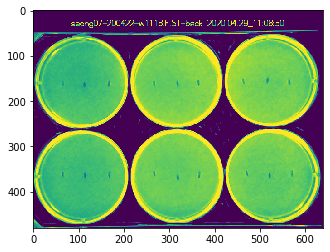

In [13]:
import matplotlib.image as mpimg
for target in tqdm(targets):
    k = 0
    data_dir = datasets[target]
    orgmv_paths = glob.glob(os.path.join(server_data, data_dir, '*.mp4'))

    for orgmv_path in tqdm(orgmv_paths):
        cap = cv2.VideoCapture(orgmv_path)

        save_dir = os.path.join(local_data,data_dir,'original')
        os.makedirs(save_dir, exist_ok=True)

        for i in tqdm(range(1)):
            cap.set(cv2.CAP_PROP_POS_FRAMES,i)
            ret, frame = cap.read()
            if ret:
                frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                plt.imshow(frame_gray)
                plt.plot(GS[well_index])
                plt.show()
                cv2.imwrite('{}/{:05}.png'.format(save_dir,k), frame_gray)
                k += 1
            else:
                break
                

In [12]:
tr_movies = [
            'MOG2',
            #'bg_MOG2',
            #'mdbg_MOG2',
            #'md_MOG2'
            ]

# eclosionの目視判定
eclo_time = {
            'w1118_1' : ['4:48:24', '20:1:57', '21:46:3', '5:17:2', '15:31:9','11:24:14'],
            'w1118_3' : ['17:00:09', '19:53:18', '19:47:58', '21:24:47', '15:24:38', '19:39:20']
            }

# 被接近対象の半径Xピクセル内に進入した回数をカウント
nl=0
nR=0
for aa in range:
    if x<0:
        nl+=1
    elif x>0:
        nr+=1

# グラフの整形のためのもの
def set_fontsize(ax,fontsize):
    itemsx=ax.get_xticklabels()
    itemsy=ax.get_yticklabels()
    for i in range(len(itemsx)):
        itemsx[i].set_fontsize(fontsize)
    for i in range(len(itemsy)):
        itemsy[i].set_fontsize(fontsize)

for target in tqdm(targets):
    data_dir = datasets[target]
    
    file_path = os.path.join("{}/{}/csv".format(server_data, data_dir))
    file_path1 = os.path.join("{}/{}/csv".format(local_data, data_dir))
    fs_dis = np.loadtxt("{}/disper.csv".format(file_path), delimiter=",")
    
    with open(os.path.join(server_data, data_dir, 'mask_params.json')) as f:
        params = json.load(f)
    
    x = params['n-rows']
    y = params['n-clms']
    xlen = params['well-w']
    ylen = params['well-h']
    X = params['x']
    Y = params['y']

    mv_num = len(movies[target])
    #mv_num = 2
    
    wnum = x*y
    
    fps=3
    eclo_frames=np.zeros(wnum)
    for eclo in range(len(eclo_time[target])):
        tmp=eclo_time[target][eclo]
        h,m,s=tmp.split(':')
        hs=np.int(h)*3600
        ms=np.int(m)*60
        ss=np.int(s)
        alls=hs+ms+ss
        eclo_frames[eclo]=alls*fps
    
    fs_dis = fs_dis.reshape(x*y, 2, 3)

    dl_mean=np.zeros(wnum)
    dl_std=np.zeros(wnum)
    dr_mean=np.zeros(wnum)
    dr_std=np.zeros(wnum)
    distances=pd.DataFrame()

    n1s=np.array([])
    n2s=np.array([])

    # グラフ描画の範囲指定    
    dt_pre=3600*1 # eclosionから前1時間分
    dt_post=3600*20 # eclosion後20時間分
    dframe_pre=dt_pre*fps
    dframe_post=dt_post*fps

    disp_short=0
    # ********************************************
    x = 1
    y = 1
    cntr=0
    arr_all=np.array([])
    icntr=0
    for i in tqdm(range(y)): # for image placement
        arrs=np.array([])
        jcntr=0    
        for j in tqdm(range(x)): # for image placement
            fig = plt.figure(figsize=(20,20))
            G = np.loadtxt(os.path.join(file_path1, 'dispersion/well{:03}.csv'.format(cntr)), delimiter=",")
            disp_range=[eclo_frames[cntr]-dframe_pre,eclo_frames[cntr]+dframe_post]
            if disp_short==1:
                f1=np.int(disp_range[0])
                f2=np.int(disp_range[1])
            else:
                f1=0
                f2=len(G)

            wellnum=str(cntr).zfill(2)
            #fname=h+wellnum+'.csv'
            #dat=pd.read_csv(fname,header=None)
            #data=pd.DataFrame(dat.values,columns=['y-coord','x-coord'])

            oy,ox=G.T
            lx=fs_dis[cntr,1,0]
            ly=fs_dis[cntr,0,0]
            rx=fs_dis[cntr,1,2]
            ry=fs_dis[cntr,0,2]

            #ox=grav['center_x'].values
            #oy=grav['center_y'].values

            dl=((ox-lx)**2+(oy-ly)**2)**0.5
            dr=((ox-rx)**2+(oy-ry)**2)**0.5

            #dl=((dat.values[:,0]-target_loc[cntr,0])**2+(dat.values[:,1]-target_loc[cntr,1])**2)**0.5
            #dr=((dat.values[:,0]-target_loc[cntr,2])**2+(dat.values[:,1]-target_loc[cntr,3])**2)**0.5

            dl_mean[cntr]=np.mean(dl)
            dl_std[cntr]=np.std(dl)
            dr_mean[cntr]=np.mean(dr)
            dr_std[cntr]=np.std(dr)

            w=np.ones(dl.size)*cntr
            df=pd.DataFrame(np.c_[dl,dr,w],columns=['dl','dr','well'])
            distances=pd.concat([distances,df])

            bias=(dl-dr)/(dl+dr)
            bias=pd.Series(bias)
            #bias=bias.rolling(window=30).mean()

            maxt=len(ox)
            sns.set(style="white", color_codes=True)

            xs=range(len(ox))
            # ***** Visualization *****
            #sns.jointplot(x='x-coord', y='y-coord', data=data, kind='kde') #kind=kde,hex
            fontsize=18

            # 保存先がそのままだと画像が上書きされるので注意！! 下の fname も変更
            if 0: # 滞在の時間分布の図を描画したい場合ここを1に。
                #ax=sns.jointplot(x=ox[::10],y=oy[::10],
                #                 xlim=(10,210),ylim=(10,210),kind='kde')
                #fig = plt.figure()
                ax = fig.add_subplot(111)

                H = ax.hist2d(ox[f1:f2],oy[f1:f2], 
                              bins=[np.linspace(0,210,84),np.linspace(0,210,84)],
                              normed=True)
                #ax.set_xlabel('x')
                #ax.set_ylabel('y')
                divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
                cax = divider.append_axes('right', '5%', pad='3%')             
                ax.axis("off")
                H[3].set_clim(0,1e-4)
                ax.set_aspect('equal')
                fig.colorbar(H[3],cax=cax)
                #cbar.set_label("color bar", fontname="Times New Roman", fontsize=10)

                #plt.title('#Well:'+wellnum,fontsize=fontsize)


            else: # 以下は様々な統計を描画               
                bias_thre=0.5 # Bias value

                # *** 1st row ***            
                c='blue'
                ax=plt.subplot2grid((3,6),(0,0),colspan=4)
                lp=plt.plot(xs[f1:f2], bias.values[f1:f2], color=c)
                plt.plot(xs[f1:f2], np.zeros(f2-f1), color='black')
                plt.plot(xs[f1:f2], np.ones(f2-f1)*bias_thre, color='black',alpha=0.5)
                plt.plot(xs[f1:f2], np.ones(f2-f1)*(-bias_thre), color='black',alpha=0.5)
                plt.xlim((-1,maxt+1))
                plt.ylim((-1.05,1.05))
                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-1.05,1.05])
                plt.title('#Well:'+wellnum+'     Bias',fontsize=fontsize)
                set_fontsize(ax,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)

                ax=plt.subplot2grid((3,6),(0,4))
                plt.hist(bias.values[f1:f2],bins=50,range=(-1.0,1.0),orientation='horizontal',color=c)
                plt.title('Hist dr',fontsize=fontsize)
                plt.ylim(-1.05,1.05)
                set_fontsize(ax,fontsize)
                ax.set_yticklabels([])
                xl=ax.get_xlim()


                ax=plt.subplot2grid((3,6),(0,5))
                plt.bar([0,1],[np.mean(dl[f1:f2]),np.mean(dr[f1:f2])],color=c)
                ax.set_xticks([0,1])
                ax.set_xticklabels(['dL','dR'],fontsize=fontsize)
                plt.title('Average',fontsize=fontsize)
                set_fontsize(ax,fontsize)



                # *** 2st row ***
                c='red'
                ind1=np.where(bias.values[f1:f2]>=bias_thre)[0]
                ind2=np.where(bias.values[f1:f2]<=-bias_thre)[0]
                n1=len(ind1)
                n2=len(ind2)

                biasmod=np.copy(bias.values[f1:f2])
                ind=np.where((biasmod<bias_thre)&(biasmod>(-bias_thre)))[0]
                biasmod[ind]=0.0

                plotdata=np.cumsum(biasmod)
                ymax=np.max(np.abs(plotdata))
                ax=plt.subplot2grid((3,6),(1,0),colspan=4)
                lp=plt.plot(xs[f1:f2], plotdata, color=c,linewidth=3)
                plt.plot(xs, np.zeros(len(xs)), color='black')
                plt.ylim([-ymax*1.1,ymax*1.1])
                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-ymax*1.1,ymax*1.1],
                         color='k',linewidth=3)
                plt.xlim((-1,maxt+1))
                plt.title('Cumsum of Bias exceeding thre',fontsize=fontsize)
                set_fontsize(ax,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)


                ax=plt.subplot2grid((3,6),(1,4))
                plt.hist(np.r_[biasmod[ind1],biasmod[ind2]],bins=50,range=(-1.0,1.0),orientation='horizontal',color=c)
                set_fontsize(ax,fontsize)
                ax.set_xlim(xl)

                ax=plt.subplot2grid((3,6),(1,5))
                plt.bar([0,1],[n1,n2],color=c)
                ax.set_xticks([0,1])
                ax.set_xticklabels(['High','Low'],fontsize=fontsize)
                plt.title('Count',fontsize=fontsize)
                set_fontsize(ax,fontsize)



                # *** 3rd row ***
                thres=[15,20,25]
                if cntr==0:
                    onset_frames=np.zeros((wnum,len(thres)))
                xx=np.zeros((len(thres),len(dl)))
                nn1=np.zeros(len(thres))
                nn2=np.zeros(len(thres))
                for ii in range(len(thres)):
                    xx[ii,:],nn1[ii],nn2[ii]=count_entering(dl[f1:f2],dr[f1:f2],thres[ii])
                if cntr==0:
                    n1s=nn1
                    n2s=nn2
                else:
                    n1s=np.c_[n1s,nn1]
                    n2s=np.c_[n2s,nn2]

                cs=['green','magenta','cyan']
                ax=plt.subplot2grid((3,6),(2,0),colspan=4)
                if 0:
                    for ii in range(len(thres)):
                        d=np.cumsum(xx[ii])
                        lp=plt.plot(xs, d, color=cs[ii],linewidth=3)
                        enter_count_thre=600*fps
                        ind=np.where(d>enter_count_thre)[0]
                        if len(ind)==0:
                            onset_frames[cntr,ii]=0
                        else:
                            onset_frames[cntr,ii]=ind[0]
                else:
                    tmpmax=np.zeros_like(thres)
                    for ii in range(len(thres)):
                        d=np.cumsum(xx[ii])
                        ind_l=np.where(xx[ii]==+1)[0]
                        ind_r=np.where(xx[ii]==-1)[0]

                        lv,b=np.histogram(ind_l,bins=range(0,f2-f1,2000))
                        #plt.plot(b[:-1],lv,linewidth=3,color=cs[ii])
                        rv,b=np.histogram(ind_r,bins=range(0,f2-f1,2000))
                        #plt.plot(b[:-1],-rv,linewidth=3,color=cs[ii])
                        #plt.plot(b[:-1],-rv+lv,linewidth=3,color=cs[ii])
                        tmpmax[ii]=np.max([np.max(np.abs(lv)),np.max(np.abs(rv))])

                        plotdata=np.cumsum(-rv+lv)
                        plt.plot(b[:-1],np.cumsum(-rv+lv),linewidth=3,color=cs[ii])
                        tmpmax[ii]=np.max(np.abs(plotdata))


                        enter_count_thre=600*fps
                        ind=np.where(d>enter_count_thre)[0]
                        if len(ind)==0:
                            onset_frames[cntr,ii]=0
                        else:
                            onset_frames[cntr,ii]=ind[0]

                #ymax=np.max(np.abs(np.cumsum(xx[-1])))
                ymax=np.max(tmpmax)
                plt.plot(xs, np.zeros(len(xs)), color='black')
                plt.ylim([-ymax*1.1,ymax*1.1])
                for ii in range(len(thres)):        
                    plt.plot([onset_frames[cntr,ii],onset_frames[cntr,ii]],
                             [-ymax*1.1,ymax*1.1],color=cs[ii],linewidth=3)

                plt.plot([eclo_frames[cntr],eclo_frames[cntr]],[-ymax*1.1,ymax*1.1],
                        color='k',linewidth=3)
                plt.xlim((-1,maxt+1))
                plt.title('Cumsum of count entering circle (G:15,M:20,C:25 pixel)',
                          fontsize=fontsize)
                set_fontsize(ax,fontsize)
                if disp_short==1:
                    plt.xlim(disp_range)


                yl=np.max([np.max(nn1),np.max(nn2)])*1.1
                for ii in range(len(thres)):
                    ax=plt.subplot2grid((3,9),(2,6+ii))
                    plt.bar([0,1],[nn1[ii],nn2[ii]],color=cs[ii])
                    set_fontsize(ax,fontsize)
                    ax.set_xticks([0,1])
                    ax.set_xticklabels(['L','R'],fontsize=fontsize)
                    ax.set_ylim([0,yl])


            #sys.exit()
            # *************************
            
            # 滞在分布を出力する時はここも１に
            if 0:
                fname = os.path.join(local_data,data_dir,'img2')
            else:
                fname = os.path.join(local_data,data_dir,'img')
            os.makedirs(fname, exist_ok=True)
            imfname = fname+'/well{}.png'.format(wellnum)
            plt.savefig(imfname)
            arr=np.array(Image.open(imfname))
            if jcntr==0: arrs=arr
            else: arrs=np.hstack((arrs,arr))
            jcntr+=1

            plt.suptitle('#Well:'+wellnum,verticalalignment='bottom',fontsize=20)        

            plt.tight_layout()
            plt.show()

            cntr+=1
        if icntr==0: arr_all=arrs
        else: arr_all=np.vstack((arr_all,arrs))
        icntr+=1

    pil_img = Image.fromarray(arr_all)
    pil_img.save(os.path.join(fname,'img-summary.png'))
    
#plt.figure(figsize=(15, 15))
#ax = sns.violinplot(x=distances['well'], y=pkmn["dr"], split=True) 

print('done.')

TypeError: 'type' object is not iterable

NameError: name 'GS' is not defined

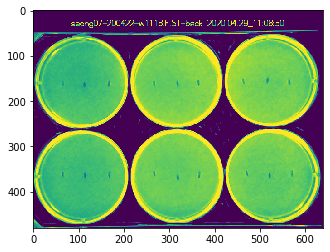

In [14]:
import matplotlib.image as mpimg
for target in tqdm(targets):
    k = 0
    data_dir = datasets[target]
    orgmv_paths = glob.glob(os.path.join(server_data, data_dir, '*.mp4'))

    for orgmv_path in tqdm(orgmv_paths):
        cap = cv2.VideoCapture(orgmv_path)

        save_dir = os.path.join(local_data,data_dir,'original')
        os.makedirs(save_dir, exist_ok=True)

        for i in tqdm(range(1)):
            cap.set(cv2.CAP_PROP_POS_FRAMES,i)
            ret, frame = cap.read()
            if ret:
                frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                plt.imshow(frame_gray)
                plt.plot(GS[well_index])
                plt.show()
                cv2.imwrite('{}/{:05}.png'.format(save_dir,k), frame_gray)
                k += 1
            else:
                break
                